In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import json
import glob
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

from IPython import display



In [11]:
class GameMap:
    def __init__(self):
        self.levels = []
        self.widths = []
        self.heights = []
        self.nmaps = 0
        
        with open("Zelda/zelda.json") as f:
            self.tiledefs = json.load(f)
            #print(self.tiledefs)
        
        for fname in sorted(glob.glob("Zelda/zelda/zelda_lvl*.txt")):
            print(fname)
            with open(fname) as f:
                data = [line.strip() for line in f.readlines()]
                self.levels.append(data)
                self.heights.append(len(data))
                self.widths.append(len(data[0]))
                self.nmaps += 1

    def getMapAsArray(self, level=0):
        a = np.ndarray((self.heights[level], self.widths[level]))
        for r, row in enumerate(self.levels[level]):
            for c, tile in enumerate(row):
                if tile == 'w':
                    a[r,c] = 0
                else:
                    a[r,c] = 1
        return a
    

            
            

In [12]:
gm = GameMap()
a = np.concatenate([gm.getMapAsArray(i) for i in range(gm.nmaps)], axis=1)
at = a.transpose()

Zelda/zelda\zelda_lvl1.txt
Zelda/zelda\zelda_lvl2.txt
Zelda/zelda\zelda_lvl3.txt
Zelda/zelda\zelda_lvl4.txt
Zelda/zelda\zelda_lvl5.txt


(0.0, 65.0)

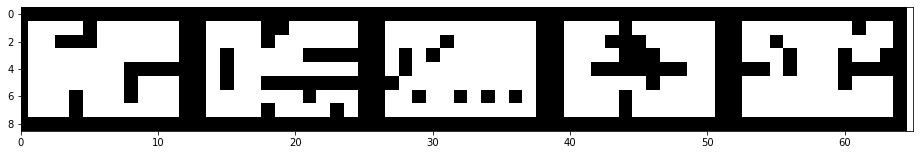

In [13]:
fig, axes = plt.subplots(1,1,figsize=(16,4))
axes.imshow(a,cmap="gray", interpolation="nearest")
axes.set_xlim(0,65)

In [14]:
hiddensize = 7
model = Sequential()
model.add(Dense(hiddensize, input_shape=(9,)))
model.add(Activation("relu"))
model.add(Dense(14))
# leaving off this final relu seems to do a much better job
#model.add(Activation("relu"))
model.add(Activation("sigmoid"))

# "mse" seems to be the best loss function for the problem
# "RMSprop" seems to be the best, with "adadelta" also good
model.compile(loss='mse', optimizer='RMSprop', metrics=['accuracy'])



In [18]:
model = Sequential()
model.add(Dense(12, input_shape=(9,)))
model.add(Activation("relu"))
model.add(Dropout(.05))

model.add(Dense(8))
model.add(Activation("relu"))
model.add(Dropout(.05))

model.add(Dense(12))
model.add(Activation("relu"))
model.add(Dropout(.05))

model.add(Dense(9))

# leaving off this final relu seems to do a much better job.  I think you don't want
# your final activation to be something with hard cutoffs.
#model.add(Activation("relu"))
model.add(Activation("sigmoid"))

# "mse" seems to be the best loss function for the problem
# "RMSprop" seems to be the best, with "adadelta" also good
model.compile(loss='mse', optimizer='RMSprop', metrics=['accuracy'])



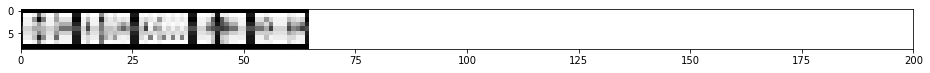

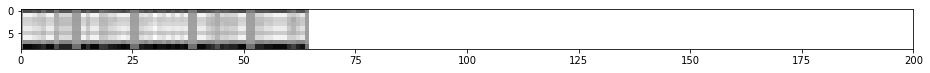

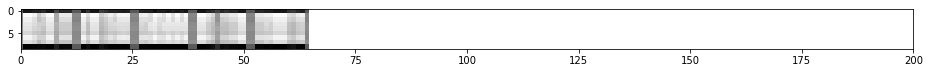

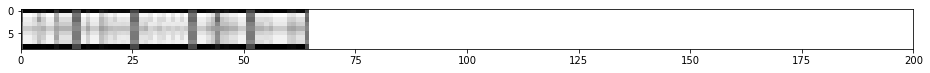

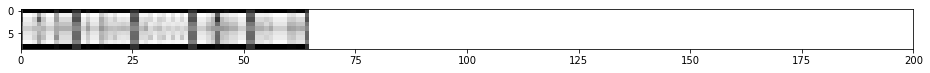

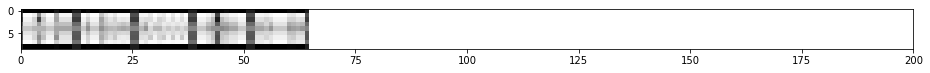

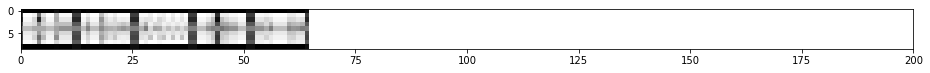

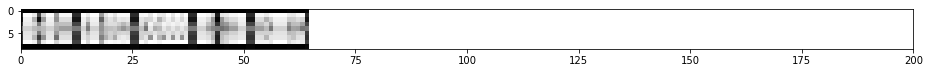

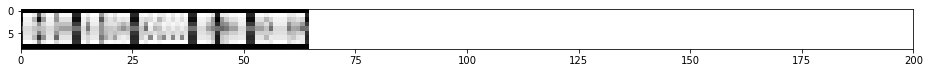

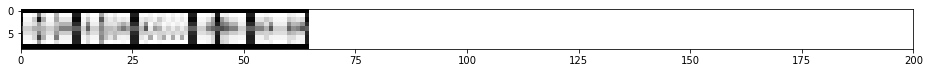

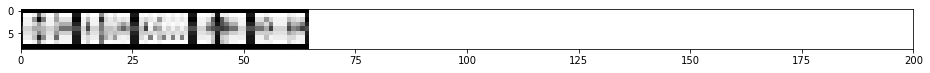

In [19]:
for i in range(10):
    model.fit(at, at, epochs=50, batch_size=64, shuffle=True, verbose=False)
    pt = model.predict(at)
    p = pt.transpose()
    fig, axes = plt.subplots(1,1,figsize=(16,4))
    axes.imshow(p,cmap="gray", interpolation="nearest")
    axes.set_xlim(0,200)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    #axes[1].imshow(a,cmap="gray", interpolation="nearest")

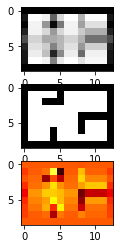

In [20]:
#test_a = gm.getMapAsArray(1) For multiple levels
test_a = gm.getMapAsArray(0)
test_at = test_a.transpose()
test_pt = model.predict(test_at)
test_p = test_pt.transpose()
fig, axes = plt.subplots(3,1,figsize=(16,4))
axes[0].imshow(test_p,cmap="gray", interpolation="nearest")
axes[1].imshow(test_a,cmap="gray", interpolation="nearest")
axes[2].imshow(test_a-test_p, interpolation="nearest", cmap="hot", vmin=-1, vmax=1)


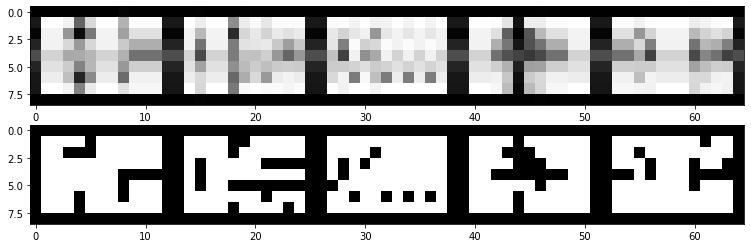

In [21]:
pt = model.predict(at)
p = pt.transpose()
fig, axes = plt.subplots(2,1,figsize=(16,4))
axes[0].imshow(p,cmap="gray", interpolation="nearest")
axes[1].imshow(a,cmap="gray", interpolation="nearest")

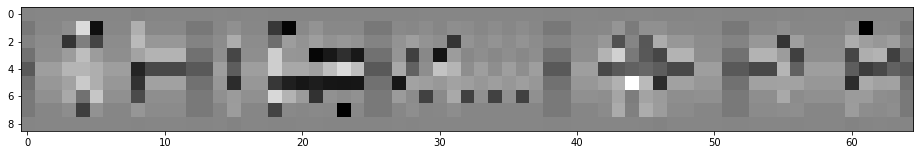

In [22]:
pt = model.predict(at)
p = pt.transpose()
fig, axes = plt.subplots(1,1,figsize=(16,4))
axes.imshow(a-p,cmap="gray", interpolation="nearest")
